# Regresion Lineal

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("./datasets/Advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
feature_cols = ["TV", "Radio", "Newspaper"]
X = data[feature_cols]
y = data["Sales"]

In [6]:
x1 = X[["TV"]]
x2 = X[["Radio"]]
x3 = X[["Newspaper"]]

1) ¿Cuál variable explica mayor porcentaje (o mayor proporción) de la varianza existente en las ventas (Sales)?

1.  x1 = TV
2.  x2 = Radio
3.  x3 = Newspaper  

# Regresion Lineal Multiple

2) Tomando las dos variables que poseen mayor coeficiente de determinación al explicar "Sales", al unirlas en un modelo múltiple y calcular el coeficiente de determinación de este nuevo modelo, ¿Aumenta o disminuye la bondad de ajuste respecto al modelo simple que tiene la mayor bondad de ajuste?<br>
1. Aumenta
2. Dismuniye 

# Feature engineer

In [11]:
#Dataset que contiene información sobre cargos de seguros de vida (Insurance charges).
df = pd.read_csv("./datasets/insurance.csv") 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


* Remover registros duplicados

* Ver si hay valores nulos y eliminarlos

* Quitar la columna region

* Genere variables dummies (binarias) para el género de la persona y si es fumador o no, pensando en añadirlas posteriormente como variables independientes para explicar "charges".

3) Al generar las variables dummies, en total se añadieron 4 variables categóricas con valores 1 y 0 para ser añadidas al modelo: (hombre, mujer, fuma, no fuma)<br>
1. Verdadero
2. Falso

Considerando la aplicación de los pasos dictados anteriormente para el dataset "insurance", responda las siguientes dos preguntas: 

4) ¿Existe más de un 1% de valores nulos en la columna "charges"? 
1. Verdadero
2. Falso 

5. Utilizando como variable dependiente "charges" y el resto de las variables presentes en el dataframe (exceptuando region) como variables independientes, ¿Cuál es el intercepto del modelo? (redondee a dos decimales)

## Curva ROC

6) La métrica AUC, indica si el modelo es capaz de distinguir una clase de otra. De ser 0.5, esta métrica indica que el modelo predice aleatoriamente.

1. Verdadero
2. Falso 

 # Overfitting

7) Un modelo con overfitting indica que posee poca información de entrada, no pudiendo generalizar sus predicciones.

1. Verdadero 
2. Falso

## Escalado de valores

In [13]:
#Dataset que contiene información sobre cargos de seguros de vida (Insurance charges).
df = pd.read_csv("./datasets/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


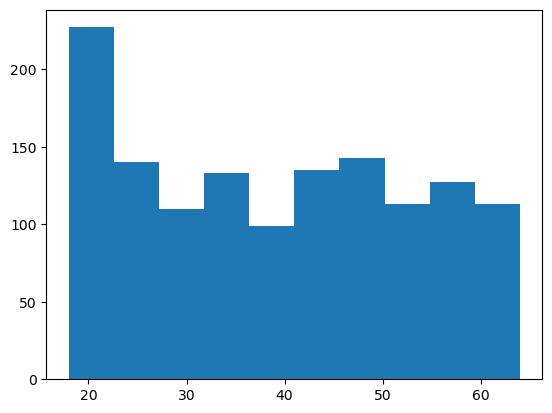

In [15]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

plt.hist(df['age']);

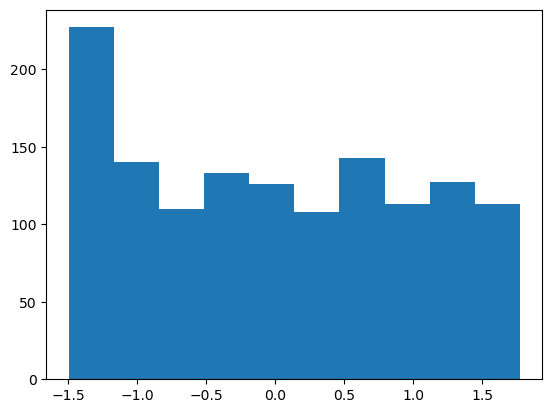

In [16]:
scaler = StandardScaler() 
scaler.fit(df[['age']]) 

df['age_Z'] = scaler.transform(df[['age']]) 
plt.hist(df['age_Z']);

8) Al estandarizar la variable "age", estamos calculando en cuántos años se aleja cada observación respecto a la media muestral de la edad. <br>
1. Verdadero <br>
2. Falso<br>

9) Usamos StandartScaler en modelos como PCA para:

1. Poder cambiar la distribución de la muestra, conviertiéndola en una distribución normal (media 0 y desviación estándar 1)<br>
2. Facilitar la comparación de variables que están en distintas escalas/unidades de medida<br>
3. Evitar que los valores outliers sesguen la estimación<br>


## Correlacion de columnas

10) Considerando la correlación de Pearson, ¿Cuál variable considera más adecuada para explicar el precio de venta (SalesPrice)? 
- descripcion del dataset 
  https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt

1. GrLivArea
2. BedroomAbvGr
3. KitchenAbvGr
4. OverallCond
5. Pesos

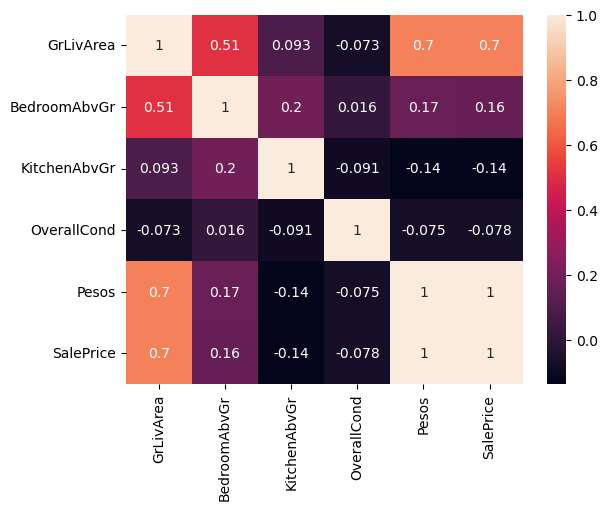

In [21]:
df = pd.read_csv("./datasets/ML_Houses_dataset.csv")
df_houses = df[['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallCond', 
                       'Pesos', 'Alley', 'Street', 'WallMat','SalePrice']]
                       
corr = df_houses.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True);

11) ¿Consideras necesario eliminar alguna de las variables del análisis? 
1. GrLivArea
2. BedroomAbvGr
3. KitchenAbvGr
4. OverallCond
5. Pesos
6. No hay información suficiente para decidir eliminar alguna. 

# Clasificacion

Que score tendriamos en el árbol de desición

In [22]:
df_houses['SalePriceBinary'] = pd.cut(x = df_houses['SalePrice'],
                                        bins=[df_houses['SalePrice'].min()-1,
                                        df_houses['SalePrice'].mean(),
                                        df_houses['SalePrice'].max()+1], 
                                        labels=['barato', 'caro'])

C:\Users\paula\AppData\Local\Temp\ipykernel_13824\2925044733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_houses['SalePriceBinary'] = pd.cut(x = df_houses['SalePrice'],


In [24]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

y_encoder = LabelEncoder().fit(df_houses['SalePriceBinary'])
y = y_encoder.transform(df_houses['SalePriceBinary'])
X = df_houses.drop(columns=['Alley','Street','WallMat', 'SalePrice', 'Pesos', 'SalePriceBinary'])

X_scaled = MinMaxScaler().fit_transform(X)

12) En qué rango se encuentra el accuracy del modelo?
1. [0.65 , 0.7)
2. [0.7 , 0.8)
3. [0.8 , 0.9)
4. [0.9 , 0.95]
5. Menor a 0.65 o mayor a 0.95

# Metricas

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = [0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1]
y_pred = [1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]

13) Cual es el valor de la exactitud (Accuracy)?

1. 0.62
2. 0.69
3. 0.71 
4. 0.83

# Ajustando Metricas

In [220]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_test = [0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1]
y_pred = [1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]

14) Considerando la clase de los 1, ¿Cuál es la cantidad de falsos positivos?<br>
1. 5<br>
2. 4<br>
3. 3<br>
4. 1<br>

# K-means

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from kneed import KneeLocator
import warnings
warnings.filterwarnings('ignore')

In [30]:
X, y = make_blobs(n_samples=200,centers=6,cluster_std=2.75,random_state=42)

15) Considerando la suma del error cuadrático (SSE), ¿Cuál sería el número óptimo de clusters?<br>

1. 1<br>
2. 2<br>
3. 3<br>
4. 4<br>
5. 5<br>
6. 6<br>

# Pipelines

16) ¿Cuál de estas afirmaciones es falsa respecto a los pipelines en Machine Learning?

1. Es posible incluir APIs como fuente de información
2. La evaluación de la performance (rendimiento) del modelo debe hacerse en paralelo al pipeline
3. Permite un flujo de trabajo cíclico

# Modelo ensamblado

17) ¿Cuál de los siguientes modelos de ensamble es iterativo? 

1. Boosting
2. Bagging
3. Stacking 